In [2]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the dataset
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
# Check files in dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
digits.data[0] #First digit data from data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

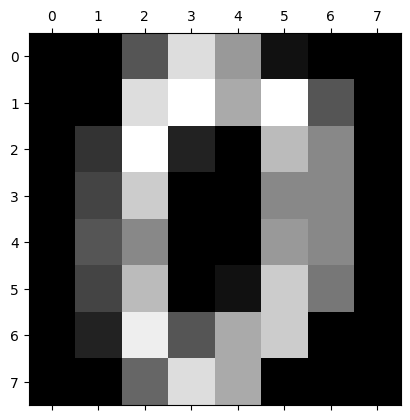

In [11]:
# Check with plot the image of the first digit from image dir
plt.gray()
plt.matshow(digits.images[0])

<Figure size 640x480 with 0 Axes>

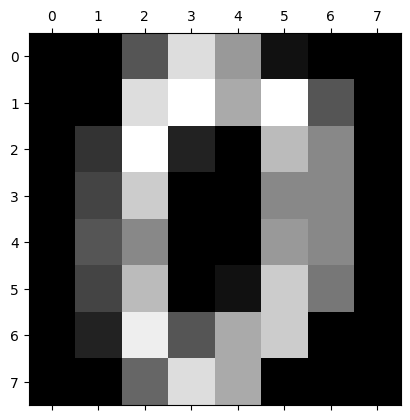

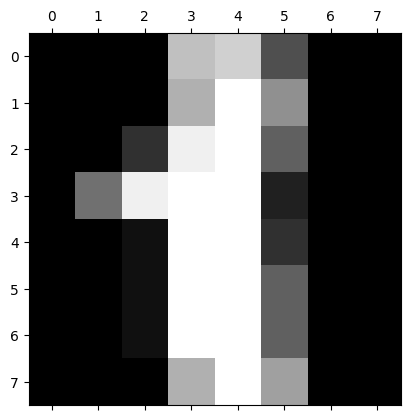

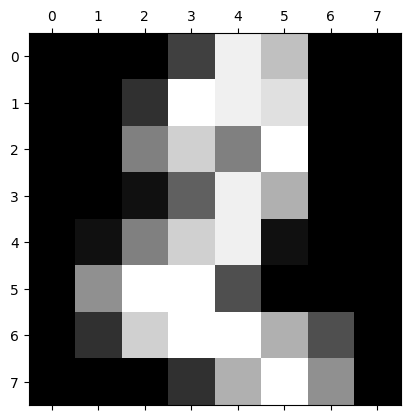

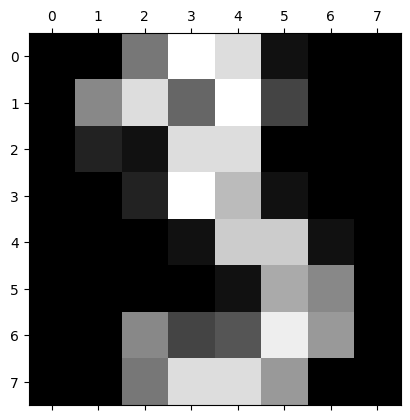

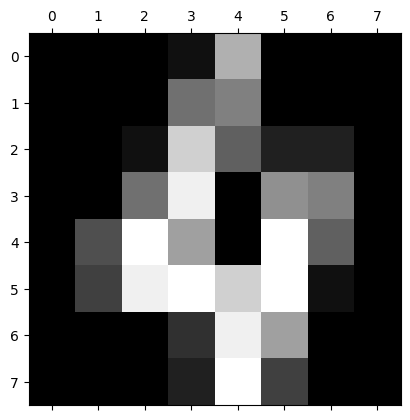

In [10]:
# Let's print first 5 images
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    plt.show()

#### Let's explore the target and target_names

In [14]:
digits.target[0] #First digit target from target

0

So target is our target variable

In [15]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [17]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

#### So we can use the data and the target varable to train our model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape

(1437, 64)

In [26]:
X_test.shape

(360, 64)

In [27]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [37]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [38]:
model.score(X_test, y_test)

0.9583333333333334

In [39]:
model.score(X_train, y_train)

1.0

Lets predict a random number from the data

<Figure size 640x480 with 0 Axes>

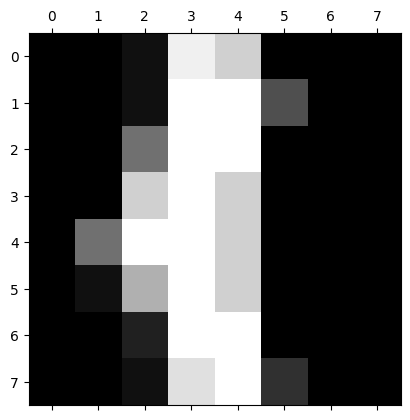

In [44]:
plt.gray()
plt.matshow(digits.images[99])

In [45]:
digits.target[99]

1

In [46]:
model.predict([digits.data[99]])

array([1])

### How to check which values our model is not predicting right

In [48]:
# First we need the predicted values
predicted = model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(y_test, predicted)
cm

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  1,  0],
       [ 0,  0,  1,  1,  0, 41,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  1,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 30]], dtype=int64)

Visualize for proper ow whats happeing

Text(95.72222222222221, 0.5, 'Actual')

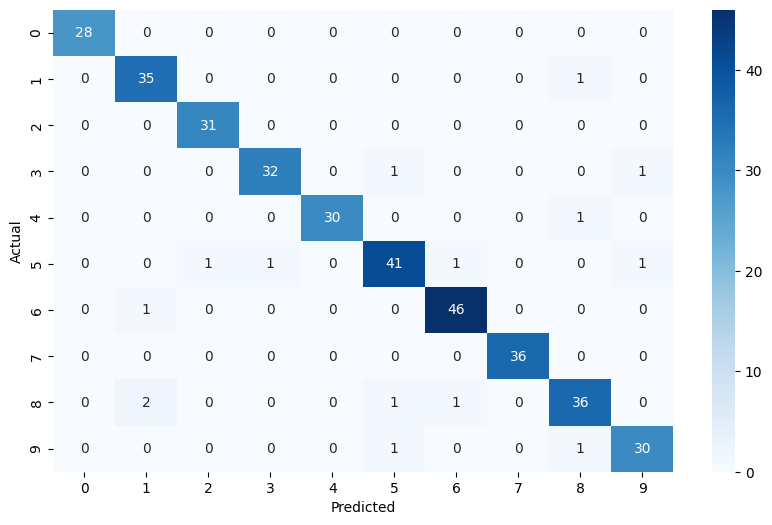

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')